# Curve Fitting

In [ ]:
%matplotlib inline

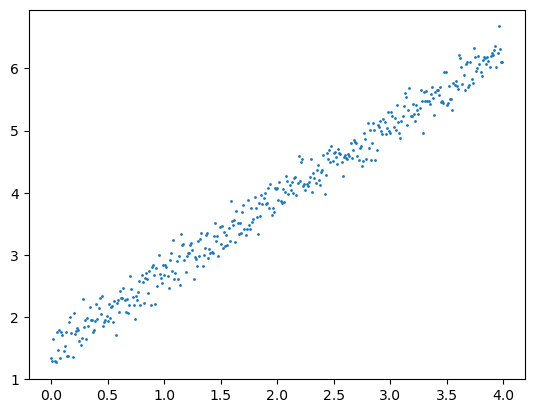

In [3]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt

#linear function
def lin_func(x,m,c):
    return m*x + c 

#generating data
xdata = np.arange(0,4,0.01)
ydata = lin_func(xdata,1.2,1.5) + 0.2 * np.random.randn(len(xdata))
plt.scatter(xdata,ydata,s=1)

In [4]:
p_opt, p_cov = cf(lin_func,xdata,ydata)
# p_opt is the array that contains optimized values of the parameters, whereas p_cov is the covariance matrix.
p_cov

array([[ 6.48166077e-05, -1.29309133e-04],
       [-1.29309133e-04,  3.44393323e-04]])

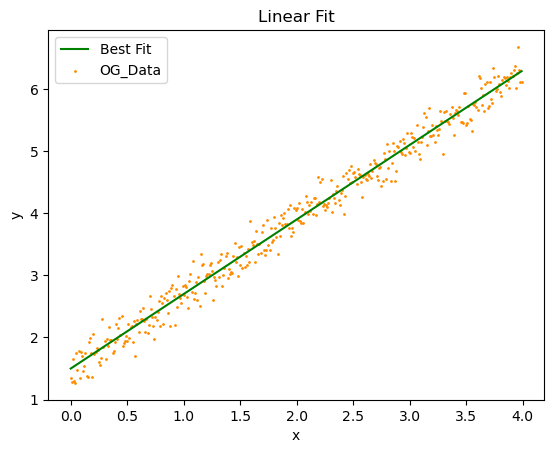

In [5]:
# Now plot the best fit along with the original data 

plt.plot(xdata,lin_func(xdata,*p_opt),label='Best Fit',color='g')
plt.scatter(xdata,ydata,label='OG_Data',s=1,color='darkorange')
# Yes, you can have scatter plot and a normal plot in one
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()

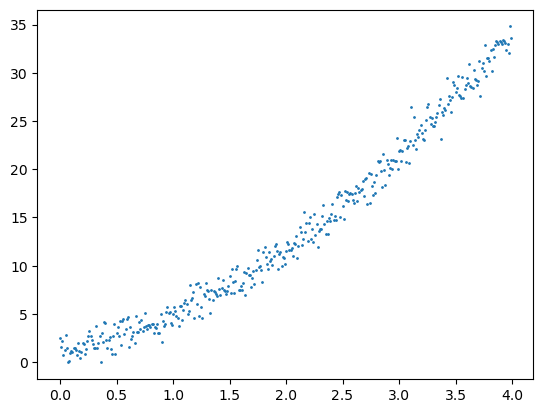

In [6]:
#new function
def quad_func(x,a,b,c):
    return a*x**2. + b*x + c

ydata = quad_func(xdata,1.5,2.3,1.2) + np.random.randn(len(xdata))

plt.scatter(xdata,ydata,s=1)

array([[ 0.00175624, -0.00700739,  0.00464824],
       [-0.00700739,  0.02983277, -0.02228365],
       [ 0.00464824, -0.02228365,  0.02225585]])

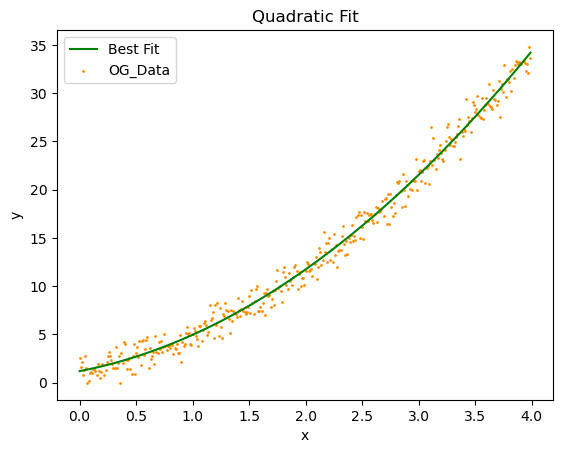

In [7]:
p_opt, p_cov = cf(quad_func,xdata,ydata)

plt.plot(xdata,quad_func(xdata,*p_opt),label='Best Fit',color='g')
plt.scatter(xdata,ydata,label='OG_Data',s=1,color='darkorange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Fit')
plt.legend()
p_cov

In [8]:
# compare the original parameters with the estimated ones
print('a_err={}, b_err={}, c_err={}'.format(*(abs(p_opt-[1.5,2.3,1.2]))))

a_err=0.00799428601164287, b_err=0.04578455542942983, c_err=0.003230764272805997


In [ ]:
#Assignment

In [ ]:
#problem1

[-0.23238807  3.41356695]


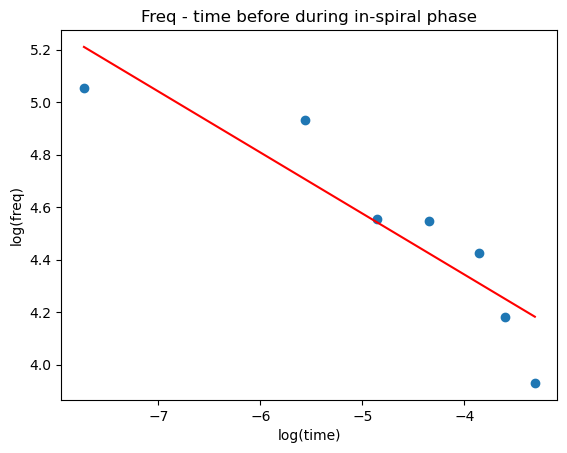

In [11]:
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

indices = []
for i in range(len(data)-1):
    if(data[i]*data[i+1] < 0):
        indices.append(i)
        
sampled_time = time[indices] #times at zero crossings
sampled_freq = freq[indices] #frequencies at zero crossings

my_indices = np.where(np.logical_and(sampled_time < 0, sampled_freq >50))
#considering only the times before the collision and frequencies greater than 50Hz

def lin(t,v,c): #defining a linear function, v denotes slope, c the y-intercept 
    return v*t + c

x_data = np.log(abs(sampled_time[my_indices]))
y_data = np.log(abs(sampled_freq[my_indices]))
plt.scatter(x_data, y_data)
p_opt, p_cov = cf(lin, x_data, y_data)
plt.xlabel("log(time)")
plt.ylabel("log(freq)")
plt.title("Freq - time before during in-spiral phase")
plt.plot(x_data, lin(x_data, *p_opt), color = "red")

print(p_opt) #fitting parameters, can be used to get the chirp mass

In [ ]:
#problem2

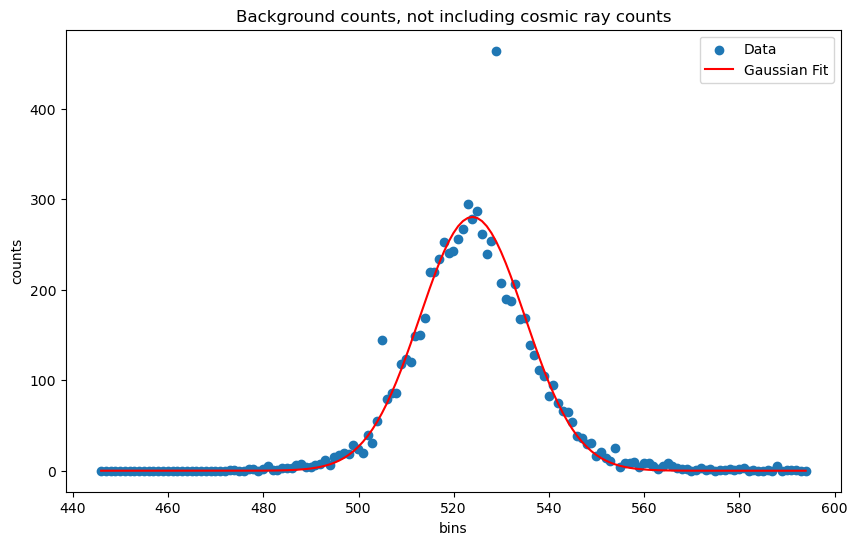

In [15]:
import numpy as np
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt


from astropy.io import fits
from scipy.optimize import curve_fit as cf
from astropy.stats import sigma_clipped_stats

m3_fits = fits.open('Messier3.fits')
m3_data = m3_fits[0].data
mean, median, std = sigma_clipped_stats(m3_data)


def get_background_histogram(array, min_count, max_count):
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

vmin = median - 5*std
vmax = median + 5*std
bins, num_pixels = get_background_histogram(m3_data[1100:1200, 1910:1990], vmin, vmax)
#background counts, not including cosmic ray counts

x_data = bins
y_data = num_pixels

def gaussian(x,mu,sigma,a): #gaussian with 3 degrees of freedom
    return a*np.exp(-1*((x-mu)**2)/(sigma**2))

from scipy.optimize import curve_fit as cf

p_opt, p_cov = cf(gaussian, x_data, y_data, (520, 40, 300)) #initial guesses for fitting parameters

plt.figure(figsize = (10,6))
plt.title("Background counts, not including cosmic ray counts")
plt.scatter(x_data, y_data, label = "Data")
plt.plot(x_data, gaussian(x_data, *p_opt), color = "red", label = "Gaussian Fit")
plt.xlabel("bins")
plt.ylabel("counts")
plt.legend()